In [1]:
import pickle
from pylab import *
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

In [2]:
with open('/data/chocula/villaa/PhotoN_SuperSim/possys/flux_data_0x0009_v4.pkl','rb') as readFile:
      data=pickle.load(readFile,encoding='latin1')

print(data.keys())

dict_keys(['costhet_2dvert', 'costhet_2dhori', 'pz', 'px', 'py', 'ptype', 'EventNum', 'y', 'color', 'costhet_3d', 'time', 'Edep', 'x', 'z', 'inout', 'volname'])


In [3]:
#trying to customize here, see:
#https://matplotlib.org/users/customizing.html
#matplotlib.rc('figure', figsize=(3.4, 3.4*(4/6)))
mpl.rcParams['lines.linewidth'] = 2

#ticks
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 22

mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 22


#error bars
#mpl.rcParams['errorbar.capsize'] = 3

#axis stuff
mpl.rcParams['axes.labelsize'] = 22

#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])

In [4]:
#set up a plot
fig = plt.figure(figsize=(12,10),frameon=False)
ax1 = fig.add_subplot(111, projection='3d')
#fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),projection='3d')
#ax1 = axes[0]

#lay out the colors
rgb_r = (255/255.0,0/255.0,0/255.0)
rgb_b = (0/255.0,0/255.0,255/255.0)
rgb_o = (255/255.0,127/255.0,0/255.0)
rgb_b = (31/255.0,120/255.0,180/255.0)
rgb_lr = (251/255.0,154/255.0,153/255.0)
rgb_g = (203/255.0,195/255.0,195/255.0)



incut = np.zeros(np.shape(data['x']))
incut[(data['inout']==1)] = 1
outcut = np.zeros(np.shape(data['x']))
outcut[(data['inout']==2)] = 1
bothcut = np.zeros(np.shape(data['x']))
bothcut[(data['inout']==3)] = 1
randcut = np.zeros(np.shape(data['x']))
randvec = np.random.rand(*np.shape(data['x']))
randcut[randvec>0.9] = 1

x = data['x'][((outcut==1)|(bothcut==1))&(randcut==1)]
y = data['y'][((outcut==1)|(bothcut==1))&(randcut==1)]
z = data['z'][((outcut==1)|(bothcut==1))&(randcut==1)]
color = data['color'][((outcut==1)|(bothcut==1))&(randcut==1)]


#ax1.scatter(data['x'][(incut==1)&(randcut==1)], data['y'][(incut==1)&(randcut==1)], data['z'][(incut==1)&(randcut==1)], s=1,c='r', marker='o',label='inward')
s = ax1.scatter(x, y, z, s=1,c=color, marker='o',label='outward',cmap='inferno')



#ax1.set_yscale('linear')
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5,0.5)
ax1.set_zlim(0.1,1.1) # try to make the aspect ratio 1:1:1
ax1.set_xlabel('sim X pos. [m]',labelpad=20,**axis_font) #labelpad is distance of axis to label
ax1.set_ylabel('sim Y pos. [m]',labelpad=20,**axis_font)
ax1.set_zlabel('sim Z pos. [m]',labelpad=20,**axis_font)
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')

#lgnd= ax1.legend(loc=2,prop={'size':22})
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

In [5]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

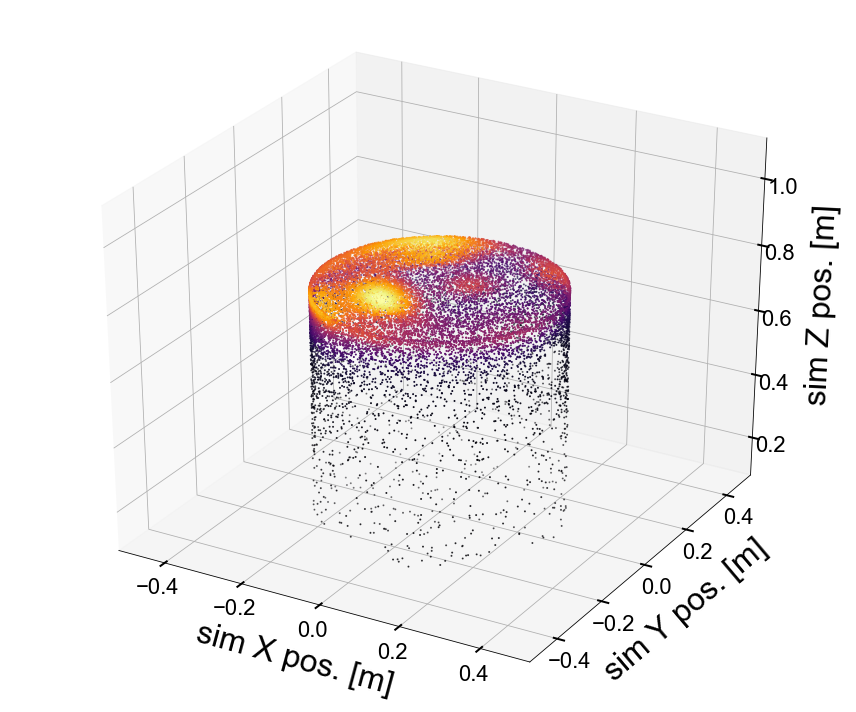

In [6]:
plt.tight_layout()
plt.savefig('figures/GammaFlux_OVC_heat.png')
#plt.colorbar(s[3],fraction=0.046,pad=0.04)
plt.show()